In [1]:
# Load Libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
# Generate Regression Dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [3]:
# Standardize Dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]


In [4]:
# Split into Train and Test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# Network
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [6]:
# Compile
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', 
                optimizer=opt,
                metrics = ['mse']
)

In [7]:
# Fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# Evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print("Train MAE : {} and Test MAE : {}".format(train_mse, test_mse))
# Train MSLE : 0.037806395441293716 and Test MSLE : 0.05387485772371292

Train MAE : 0.005291866138577461 and Test MAE : 0.005557877477258444


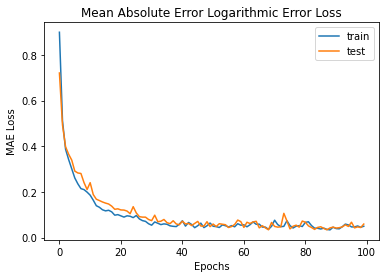

In [9]:
# Plot MSE
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Mean Absolute Error Logarithmic Error Loss')
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.legend()
plt.show()

In [10]:
!jupyter nbconvert --to script mean_squared_absolute_error_loss_training_epochs_regression.ipynb

[NbConvertApp] Converting notebook mean_squared_absolute_error_loss_training_epochs_regression.ipynb to script
[NbConvertApp] Writing 1864 bytes to mean_squared_absolute_error_loss_training_epochs_regression.py
